In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

austin_pet = "Austin_Animal_Center_Outcomes.csv"
austin_pet_df = pd.read_csv(austin_pet)
# dataframe = pd.DataFrame(austin_pet)
austin_pet_df = austin_pet_df[["Sex upon Outcome","Outcome Type"]]
# new_data = austin_pet_df.groupby("Sex upon Outcome").groupby("Outcome Type").count()
# new_data
# austin_pet_df["Sex upon Outcome"].value_counts()
# austin_pet_df.replace(regex={'Intact Male': 'male'})
austin_pet_df = austin_pet_df.replace(regex={'Neutered Male': 'male', 'Intact Male': 'male', 'Spayed Female': 'female',
                             'Intact Female': 'female'})


# Get names of indexes for which column Age has value 30
unknowns = austin_pet_df[ austin_pet_df['Sex upon Outcome'] == 'Unknown' ].index
# unknowns_2 = austin_pet_df[ austin_pet_df['Outcome Type'] == 'Relocate' ].index
# Delete these row indexes from dataFrame
austin_pet_df.drop(unknowns , inplace=True)
# austin_pet_df.drop(unknowns_2 , inplace=True)


austin_pet_df = austin_pet_df.rename(columns={'Sex upon Outcome': 'Sex', 'Outcome Type': 'Outcome'})

austin_pet_df

,Sex,Outcome
0,male,Return to Owner
1,male,Return to Owner
2,male,Adoption
4,female,Adoption
5,female,Return to Owner
6,male,Return to Owner
7,female,Adoption
8,female,Transfer
9,female,Adoption
10,female,Adoption


In [117]:
df1 = austin_pet_df.copy()
df1['Count'] = 1
df2 = df1.groupby(by=['Outcome','Sex']).count().reset_index()
df2

,Outcome,Sex,Count
0,Adoption,female,23192
1,Adoption,male,23507
2,Died,female,324
3,Died,male,389
4,Disposal,female,19
5,Disposal,male,41
6,Euthanasia,female,1380
7,Euthanasia,male,1844
8,Missing,female,33
9,Missing,male,28


In [118]:
df2.groupby('Sex').head()

,Outcome,Sex,Count
0,Adoption,female,23192
1,Adoption,male,23507
2,Died,female,324
3,Died,male,389
4,Disposal,female,19
5,Disposal,male,41
6,Euthanasia,female,1380
7,Euthanasia,male,1844
8,Missing,female,33
9,Missing,male,28


In [119]:
males = df2.loc[df2['Sex'] == 'male']
males_list = males['Count']
males_list = list(males_list)
males_list

[23507, 389, 41, 1844, 28, 11098, 274, 14192]

In [123]:
females = df2.loc[df2['Sex'] == 'female']
females_list = females['Count']
females_list = list(females_list)
females_list = [x for x in females_list if x != 1]
females_list

[23192, 324, 19, 1380, 33, 7982, 191, 14189]

In [124]:
index = males['Outcome']
index = list(index)
index

['Adoption',
 'Died',
 'Disposal',
 'Euthanasia',
 'Missing',
 'Return to Owner',
 'Rto-Adopt',
 'Transfer']

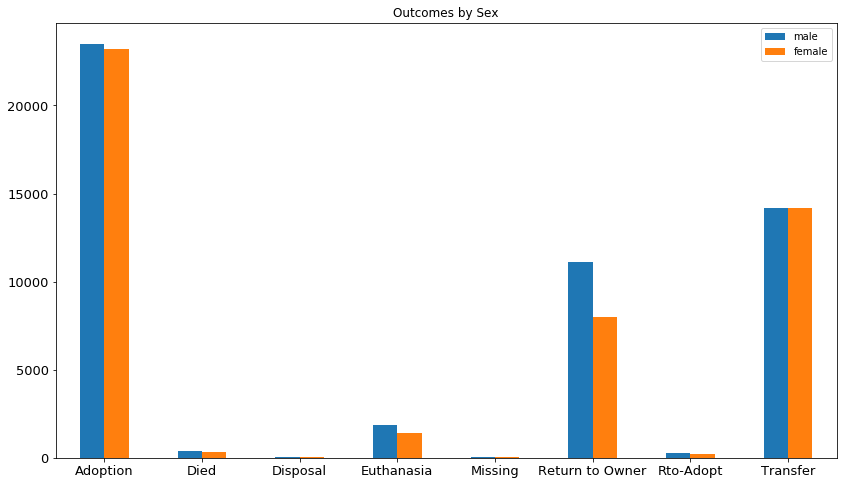

In [140]:
df = pd.DataFrame({'male': males_list,
                  'female': females_list}, index = index)
ax = df.plot.bar(rot=0, figsize = (14,8), fontsize = 13, title = 'Outcomes by Sex')
plt.savefig('outcomes_by_sex.png')